In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
credit_data=pd.read_csv('../data/data2.csv')

In [18]:
# Null values in columns
credit_data.columns[credit_data.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [20]:
# Head of rows with nulls values in specific row
credit_data[credit_data['person_emp_length'].isnull()].head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


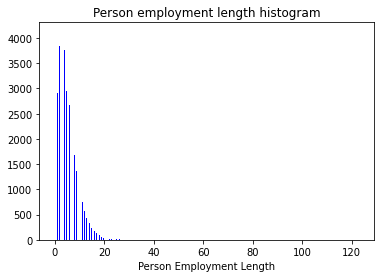

Data filled by median


In [22]:
# Impute the null values with the median value for all employment lengths
credit_data['person_emp_length'].fillna((credit_data['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(credit_data['person_emp_length'],
                            bins='auto', 
                            color='blue')
plt.title("Person employment length histogram")                            
plt.xlabel("Person Employment Length")
plt.show()

print("Data filled by median")

In [31]:
# Number of null values
print(credit_data['loan_int_rate'].isnull().sum())

3116


In [34]:
# save indices of loan int rate nulls
indices = credit_data[credit_data['loan_int_rate'].isnull()].index

# Save the new data without missing data
credit_data_cleaned = credit_data.drop(indices)
credit_data_cleaned.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
